In [1]:
import DORA   #imports our famous function
import os # imports os tools to help interate thorugh and manipulate folders



Below is the block containing all the relevant parameters for all the runs of my jupyter code


In [2]:
#universal parameters
file_name = '00021.csv'  # 00086.csv or
pixel_size = 154  # in nanometers
time_step = 20  # miliseconds per frame in trajectory movie
frame_start = 0  # enter 0 to start from beginning of dataset
frame_end = 100  # enter -1 to end at the last value of the data set
cmap = "spring" # enter a color map string from this https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
exp_tag = "Glycerol_50_Laser_50" # a tag that caries the name of the experiment
first_zero_end = 'no'  # yes to cut off all values after first 0,0 = x,y


#downsampling parameters
bin_size = 20  # bin size for downsample/filter processing
processing = "none"  # enter downsample, moving average, or none

#Plot Parameters

#Which Graph?
plot_type = "angular_continuous_filtered"
#Graphing options:
    #Trajectory Maps:
        #2D: Colorful 2D visulization of the rotor from above
        #3D: 2D plot but time is an axis
    
    # Grid plot
        #grid: a grid of little snippets of the data
        
    #Angular Analysis
        #By Jerry
                #radius_filter: Demarcate the sus data points that will be eliminated from calculations
                #find_sus_angle: Indicate sus angles within angular_continuous by Jerry
                #angular_continuous_filtered: Angular Continuous recalculated with sus points filtered. Sus skips indicated.
                #basal3: Graphs tailored for the basal graph analysis 3/14/2022
                    #Angular Continuous with a downsampled curve as well. still has bugs with error labelling



    ############################### these have not been converted yet:
        #By Claire:
                #angular: angle vs time, but it's not cummulative and resets at 360 to 0 (Claire)
                #angular_continuous: Claire's Calculation of a cummulative angle
                #find_sus_angle_CR: Indicate sus angles within angular_continuous by Claire's calculations

    #Animation
        #interactive: Interactive graph
        #animated: animated trajectory in notebook
        #HTML: Animated trajectory in a new window. May run better

##### Trajectory Maps Parameters:

# "yes" enables center display of center coordinates if 2D or Find sus angle
display_center = "yes"

#Labels
title = "RecBCD.csv"
x_axis_label = "x (nm)"
y_axis_label = "y (nm)"
z_axis_label = "Time (ms)"  
unit = "nm"  # enter pixel or nm

#Formatting parameters
pixel_min = -0.75  # setting min/max axis range (pixel)
pixel_max = 0.75

# change axis increments for nicely fitting tick marks (pixel)
axis_increment_pixel = 7
# change axis increments for nicely fitting tick marks (nm)
axis_increment_nm = 7
nm_min = -150  # setting min/max axis range (nm)
nm_max = 150
#Do you want to save your plot?
save_plot = 'no'

#########Angle Versus Time (AVT or avt) Graphs

#       Formatting parameters for 'radius filter plot'
rad_filter_type_lower = 'nm'  # enter 'zscore' or 'nm' for choice
rad_filter_type_upper = 'zscore'  # enter 'zscore' or 'nm' for choice
z_up = 3  # enter an upper bound for z score.
z_down = -3  # enter a lower bound for z score
dist_low = 30  # lower bound for ABS of Radius filter
dist_high = 70  # upper bound for ABS of Radius filter

#       Formatting parameters for 'angular_continuous_filtered' plot
# enter 'line' or 'scatter' for a line graph or a scatter plot. Line plot makes up points when hovered
graph_style = 'line'


#Formatting parameters 'grid' plot
frames_per_plot = 195  # refers to grid plot
columns = 7  # columns of plots (grid plot)
fig_size_x = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot
fig_size_y  = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot

#Formatting parameters 'animation' plot
frame_speed = 20  # for animation only (ms)
tail_length = 50  # for animation only

#DORA.table parameters: 
save_table = 'no' #saves filtered table if "yes"

#DORA.collect_variable parameter package
###DataTable = avt_good cannot have bc it has not been defined yet
col = "Delta Angle"
sample_conditions= "G50L50_4.20.2022_"
name_saving_folder = "saving_folder"





In [ ]:
'''

# Template of lists for DORA function Call

initial_parameters = [file_name,time_step, frame_start, frame_end, cmap, exp_tag,first_zero_end]
center, data, ind_invalid_reading, data_back = find_center(*initial_parameters)


# DORA.down_sample(*downsample_parameters)
downsample_parameters = [bin_size, processing, data, center, time_step, pixel_size, frame_start, frame_end]
down_sampled_df = DORA.downsample(*downsample_parameters)



# DORA.graph(plot_type,*tajectory_map_parameters)
DORA.graph(plot_type,*avt_parameters)

#Trajectory map parameters:
tajectory_map_parameters = [file_name, down_sampled_df, plot_type, display_center, title, x_axis_label, y_axis_label, z_axis_label, unit, 
pixel_min, pixel_max, axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, frame_start, frame_end, time_step,cmap,exp_tag]

#Angle Versus Time (AVT or avt) parameters:
avt_parameters = [file_name, down_sampled_df, plot_type, display_center, ind_invalid_reading, rad_filter_type_upper,
                  rad_filter_type_lower, z_up, z_down, dist_high, dist_low, graph_style, bin_size, frame_start, frame_end,
                  display_center, title, x_axis_label, y_axis_label, z_axis_label, unit, pixel_min, pixel_max,
                  axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, data_back, cmap,exp_tag] 

#DORA.table parameters: 

save_table = 'yes' #saves filtered table if "yes"

table_parameters = [down_sampled_df, ind_invalid_reading, rad_filter_type_upper,
                    rad_filter_type_lower, z_up, z_down, dist_high, dist_low, bin_size, data_back,save_table,file_name]

data, avt_good, avt_bad, data_final_final = DORA.table(*table_parameters)

#DORA.collect_variable(DataTable, col, file_name, sample_conditions,name_saving_folder)


''' 

The ensuing code should run on 5.csv files or 5times


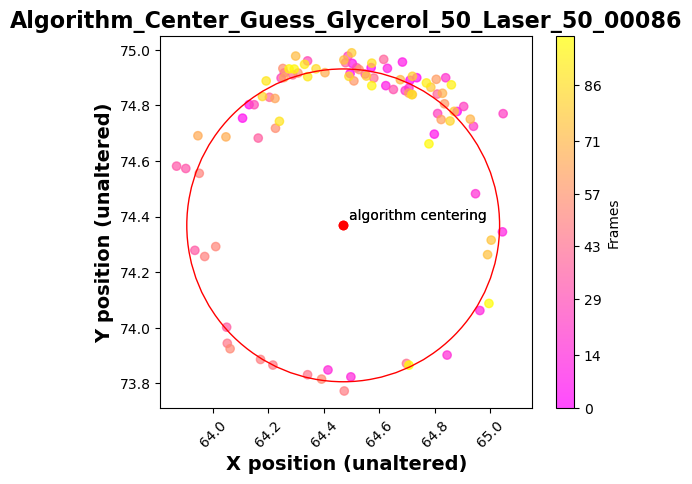

The center is (64.46968592429647, 74.36831571617904)
If the center is satisfactory, change the find_center_coordinates parameter to no
If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again
Directory  saving_folder  already exists
I have SAVED the file, my_file_name, in the directory name_saving_folder


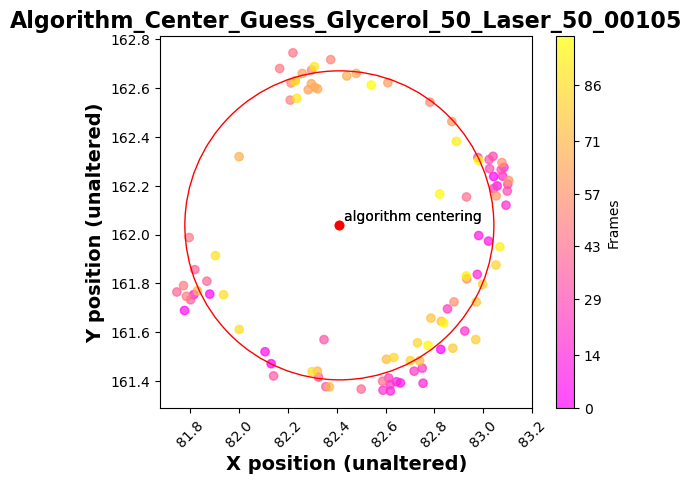

The center is (82.41078933404415, 162.0374382174745)
If the center is satisfactory, change the find_center_coordinates parameter to no
If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again
Directory  saving_folder  already exists
I have SAVED the file, my_file_name, in the directory name_saving_folder


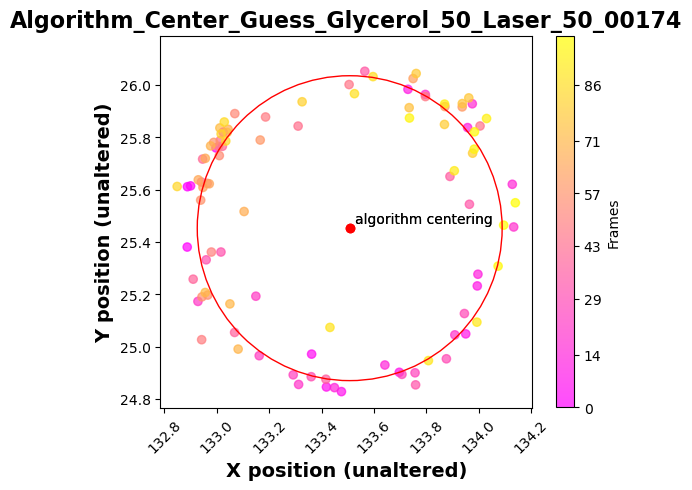

The center is (133.50747493821748, 25.45290160665707)
If the center is satisfactory, change the find_center_coordinates parameter to no
If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again
Directory  saving_folder  already exists
I have SAVED the file, my_file_name, in the directory name_saving_folder


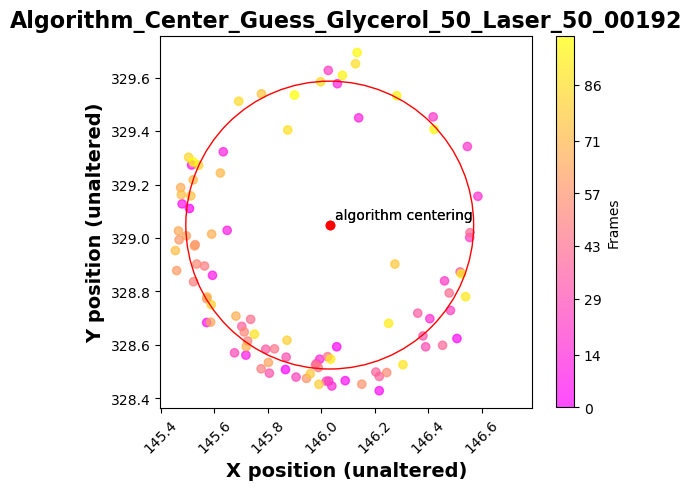

The center is (146.0317607023278, 329.0485055106027)
If the center is satisfactory, change the find_center_coordinates parameter to no
If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again
Directory  saving_folder  already exists
I have SAVED the file, my_file_name, in the directory name_saving_folder


In [3]:
#Create a for loop to run over a folder of csv's of .csv trajectories that meet the following criterion:
# 1) filtered so that the relevant angular range is defined 

# to iterate over a folder you need all the files of the folder first

#Set target folder: 
target_folder = r"C:\Users\jerry\Desktop\Research\Kosuri\Rotor_Data_Interpretation\Jerry_Time_to_shine\DORA_Visualization-main\DORA_Visualization_Testing_3.31.2022\working_folder"
os.chdir(target_folder)

#Take all files in the current folder(the one we just switched to) and store it in a list through which we will iterate
my_files = os.listdir(os.getcwd())

## GOAL: try to count the number of .csv's so that when the function is number of csv's run is less than the OG amount, then keep going but stop when equal
#counter number of files for stopping point
count = 0
for path in os.scandir(os.getcwd()):
    if path.is_file():
        count += 1
        count_str = str(count)
        
print("The ensuing code should run on " + count_str + ".csv files or " + count_str + "times")


for file_name in my_files:
    if '.csv' in file_name:
        
        #change the folder to the target folder (esp useful given each run moves the saving location)
        os.chdir(target_folder)
        
        #Run DORA find_center, but filename is controlled as the iterable 
        initial_parameters = [file_name,time_step, frame_start, frame_end, cmap, exp_tag,first_zero_end]
        center, data, ind_invalid_reading, data_back = DORA.find_center(*initial_parameters)

        #Run DORA downsample, 
        downsample_parameters = [bin_size, processing, data, center, time_step, pixel_size, frame_start, frame_end]
        down_sampled_df = DORA.downsample(*downsample_parameters)

        #Run DORA Table
        table_parameters = [down_sampled_df, ind_invalid_reading, rad_filter_type_upper,
                            rad_filter_type_lower, z_up, z_down, dist_high, dist_low, bin_size, data_back,save_table,file_name]
        data, avt_good, avt_bad, data_final_final = DORA.table(*table_parameters)

        # #Trajectory map parameters
        # #used with 2D or 3D
        # tajectory_map_parameters = [down_sampled_df, plot_type, display_center, title, x_axis_label, y_axis_label, z_axis_label, unit, 
        # pixel_min, pixel_max, axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, frame_start, frame_end, time_step]

        # #Angle Versus Time (AVT or avt) parameters
        # # used with rad_fitler, find_sus_angle, angular_continuous_filtered
        # avt_parameters = [down_sampled_df, plot_type, display_center, ind_invalid_reading, rad_filter_type_upper,
        #                 rad_filter_type_lower, z_up, z_down, dist_high, dist_low, graph_style, bin_size, frame_start, frame_end,
        #                 display_center, title, x_axis_label, y_axis_label, z_axis_label, unit, pixel_min, pixel_max,
        #                 axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, data_back]

        # # DORA.graph(plot_type,*tajectory_map_parameters)
        # DORA.graph(plot_type,*avt_parameters)


        #Run DORA Collect Variable
        
        DataTable, col, file_name, sample_conditions = [avt_good, "Delta Angle", file_name, "G50L50_4.21.2022_"]
        DORA.collect_variable(DataTable, col, file_name, sample_conditions,name_saving_folder)

        



one sum done
one sum done
one sum done
one sum done


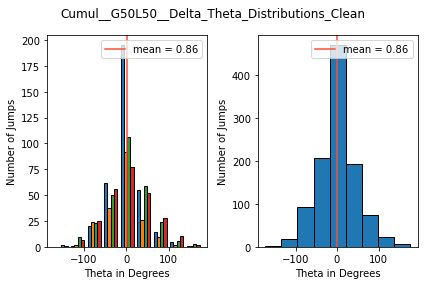

In [4]:
#from the that folder of Delta Theta CSV's run the CSV to Big Histogram function

import post_processing_functions

target_folder = r'C:\Users\jerry\Desktop\Research\Kosuri\Rotor_Data_Interpretation\Jerry_Time_to_shine\DORA_Visualization-main\DORA_Visualization_Testing_3.31.2022\working_folder\product_folder\Clean'
name_saving_folder = 'Histograms'
sample_conditions = '_G50L50_'

post_processing_functions.csv2Hist(target_folder, name_saving_folder, sample_conditions)